In [1]:
#### Importing libraries

import time
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate


from apyori import apriori

from wordcloud import WordCloud

#ignore warning
warnings.filterwarnings('ignore')

 Because the size of the data was big and my computer is not able to process data, I only work on reviews for the 2015

In [2]:
# import Data
path='/Users/hoda/Desktop/amazon_data.xlsx'
df=pd.read_excel(path)

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,52751110,R3TCS539R1S77W,B0073O0AME,229870641,Duets II: The Great Performances [Blu-ray],Video DVD,4,0,0,N,Y,Four Stars,Very good! Buy.,2015-07-15
1,US,24389524,R10HJG14I4ICD6,B0052YAXT2,356100294,MAXIMILIAN SAINT OF AUSCHWITZ performed by LEO...,Video DVD,4,0,0,N,Y,Four Stars,Excellent movie - especially enjoyed understan...,2015-07-15
2,US,25230040,RMXXXO4OX7TNZ,B004CRR9IS,210220108,Jillian Michaels Ripped in 30,Video DVD,5,1,2,N,Y,... not a fan of working out but I do like thi...,I am not a fan of working out but I do like th...,2015-07-15
3,US,29608241,R37YILYQ5APKYP,B00KTFJ6J2,372949553,NYPD Blue: Season 7,Video DVD,5,0,0,N,Y,Nice did set,Very happy,2015-07-15
4,US,17896413,R1SNOMGEKJILYM,B000Q66J1M,693056347,2001: A Space Odyssey [Blu-ray],Video DVD,5,1,1,N,Y,... do not own it (c) - if you don't like it. ...,you're a complete and utter moron if you<br />...,2015-07-15


In [4]:
df.shape

(681845, 15)

In [5]:
# Null values
df.info(null_counts=True)
# No Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681845 entries, 0 to 681844
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        681845 non-null  object
 1   customer_id        681845 non-null  int64 
 2   review_id          681845 non-null  object
 3   product_id         681845 non-null  object
 4   product_parent     681845 non-null  int64 
 5   product_title      681845 non-null  object
 6   product_category   681845 non-null  object
 7   star_rating        681845 non-null  int64 
 8   helpful_votes      681845 non-null  int64 
 9   total_votes        681845 non-null  int64 
 10  vine               681845 non-null  object
 11  verified_purchase  681845 non-null  object
 12  review_headline    681844 non-null  object
 13  review_body        681845 non-null  object
 14  review_date        681845 non-null  object
dtypes: int64(5), object(10)
memory usage: 78.0+ MB


In [6]:
print("Total number of ratings  :",df.star_rating.nunique())
print("Total number of users    :", df.customer_id.nunique())
print("Total number of movies :", df.product_id.nunique())

Total number of ratings  : 5
Total number of users    : 325699
Total number of movies : 115895


In [7]:
# Checking duplacte rows
duplicate=df[df.duplicated()]
duplicate.any()

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline      False
review_body          False
review_date          False
dtype: bool

In [8]:
# Number of Null values in the whole dataset
missing_value=df.isnull().sum()
missing_value
# One Null values in review_headline

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      1
review_body          0
review_date          0
dtype: int64

In [9]:
# Statictic reviews
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,6.818450e+05,6.818450e+05,681845.000000,681845.000000,681845.000000
mean,2.571115e+07,5.008651e+08,4.541155,0.597850,1.115055
std,1.587092e+07,2.887948e+08,0.986766,5.597796,7.263682
min,1.024600e+04,1.658000e+03,1.000000,0.000000,0.000000
25%,1.277311e+07,2.502991e+08,5.000000,0.000000,0.000000
50%,2.378907e+07,5.060290e+08,5.000000,0.000000,0.000000
75%,4.044127e+07,7.516766e+08,5.000000,0.000000,1.000000
max,5.309639e+07,9.999881e+08,5.000000,1218.000000,1401.000000


The codes show a word cloud base on the text of the review in the Whole dataset and visualize the most common words in the reviews.

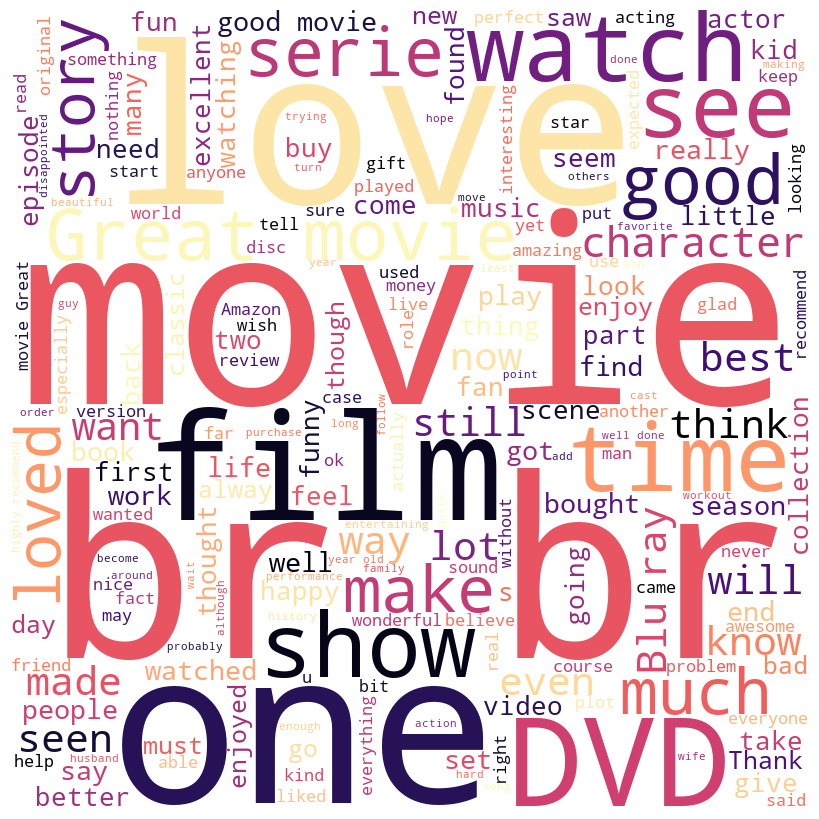

In [10]:
df['review_body']=df['review_body'].astype(str)

# creating word clouds of the most common words used in the reviews.
reviews_text = ' '.join(df['review_body'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white',colormap='magma', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

creating word clouds of the most common words used in the reviews for movies with rating more than 3

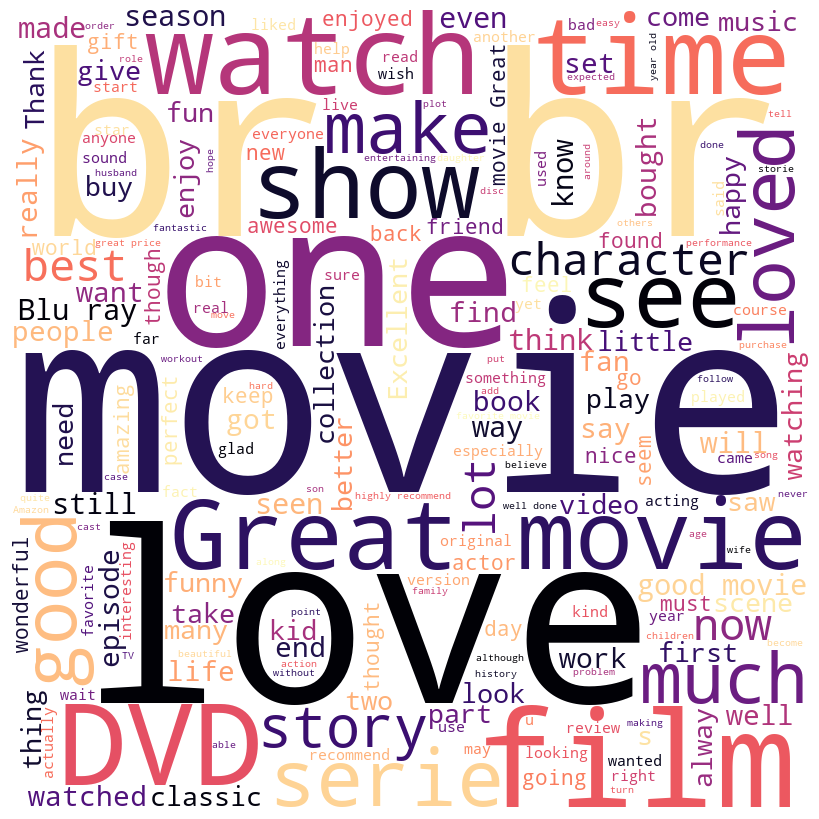

In [11]:

low_rating_df = df[df['star_rating'] > 3.0]
reviews_text = ' '.join(low_rating_df['review_body'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='magma',min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Whole the dataset is not useful for recommended system, only need keep columns that will used for analysis.

In [12]:
df_reduced=df[['customer_id', 'product_id', 'star_rating', 'product_title']]


In [13]:
# Check duplication for the chosen dataset
duplicates=df_reduced[df_reduced.duplicated()]
print('Number of duplicated rows are ',len(duplicates))

# Deleting duplicated rows
df_reduced=df_reduced[~df_reduced.duplicated()]
duplicates=df_reduced[df_reduced.duplicated()]
print('Number of duplicated rows are ',len(duplicates))

Number of duplicated rows are  8
Number of duplicated rows are  0


In [14]:
# Size of the reduced dataset
print('Size of dataset:',df_reduced.shape)
print('Total reviews in reduced dataset',df_reduced.shape[0])

Size of dataset: (681837, 4)
Total reviews in reduced dataset 681837


In [15]:
print("Total number of ratings :",df_reduced.star_rating.nunique())
print("Total number of users   :", df_reduced.customer_id.nunique())
print("Total number of movies:", df_reduced.product_id.nunique())
print("Total number of titles  :", df_reduced.product_title.nunique())

Total number of ratings : 5
Total number of users   : 325699
Total number of movies: 115895
Total number of titles  : 110809


In [16]:
# Checking dataset for Null values
df_reduced.info(null_counts=True)
# There is not any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681837 entries, 0 to 681844
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    681837 non-null  int64 
 1   product_id     681837 non-null  object
 2   star_rating    681837 non-null  int64 
 3   product_title  681837 non-null  object
dtypes: int64(2), object(2)
memory usage: 26.0+ MB


In [17]:
# Number of Null values
df_reduced.isnull().sum()

customer_id      0
product_id       0
star_rating      0
product_title    0
dtype: int64

In [18]:
df_reduced.describe()

,customer_id,star_rating
count,6.818370e+05,681837.000000
mean,2.571125e+07,4.541151
std,1.587094e+07,0.986770
min,1.024600e+04,1.000000
25%,1.277311e+07,5.000000
50%,2.378914e+07,5.000000
75%,4.044144e+07,5.000000
max,5.309639e+07,5.000000


In [19]:
print("Unique value of Rating:",df_reduced.star_rating.unique())

Unique value of Rating: [4 5 3 1 2]


In [20]:
customers=df_reduced['customer_id'].value_counts()
products=df_reduced['product_id'].value_counts()
print('number of reviews per users:',len(customers)) 
print('Numner of reviews per videos',len(products))  # Numner of reviews per videos
quantiles = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5,0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995,0.999, 1]
print('customers\n', customers.quantile(quantiles))
print('movies\n', products.quantile(quantiles))

# Only 5% of customers have rated 6 or more videos
# Only 5% of videos have been rated by more than 22 customers.

number of reviews per users: 325699
Numner of reviews per videos 115895
customers
 0.000      1.0
0.010      1.0
0.020      1.0
0.030      1.0
0.040      1.0
0.050      1.0
0.100      1.0
0.250      1.0
0.500      1.0
0.750      2.0
0.900      4.0
0.950      6.0
0.960      7.0
0.970      8.0
0.980     11.0
0.990     17.0
0.995     26.0
0.999     60.0
1.000    563.0
Name: customer_id, dtype: float64
movies
 0.000       1.00
0.010       1.00
0.020       1.00
0.030       1.00
0.040       1.00
0.050       1.00
0.100       1.00
0.250       1.00
0.500       2.00
0.750       5.00
0.900      12.00
0.950      22.00
0.960      26.00
0.970      31.00
0.980      40.12
0.990      61.00
0.995      91.00
0.999     211.00
1.000    1796.00
Name: product_id, dtype: float64


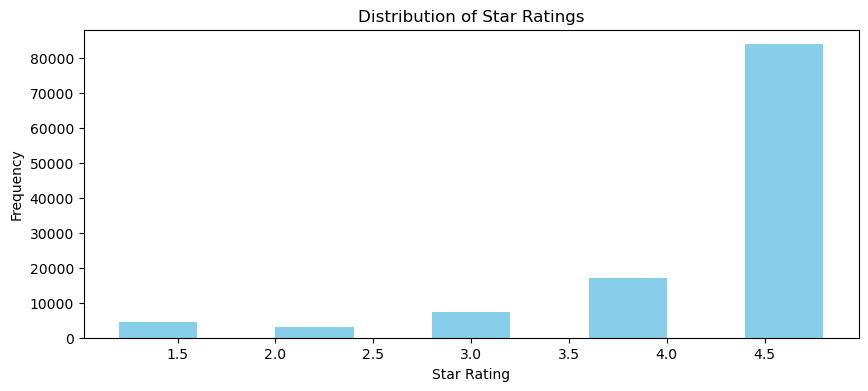

In [21]:


# Calculate average ratings and rating counts for DVDs
ratings = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].count())

# Visualize the distribution of star ratings
plt.figure(figsize=(10, 4))
plt.hist(ratings['star_rating'], bins=5, range=(1, 5), align='mid', rwidth=0.5,color='skyblue')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()


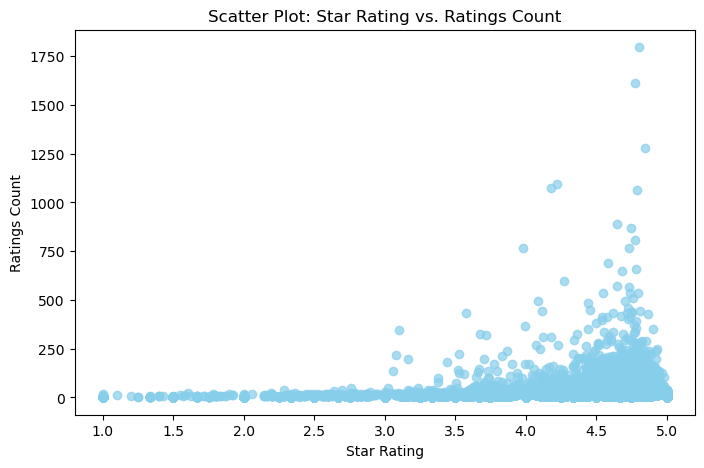

In [22]:

# Create a scatter plot for star_rating vs. ratings_count
plt.figure(figsize=(8, 5))
plt.scatter(ratings['star_rating'],ratings['ratings_count'], color='skyblue', alpha=0.7)
plt.xlabel('Star Rating')
plt.ylabel('Ratings Count')
plt.title('Scatter Plot: Star Rating vs. Ratings Count')
plt.show()



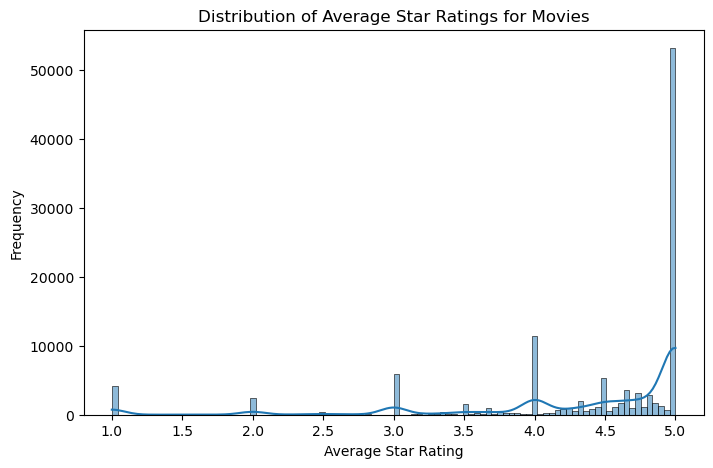

In [23]:
# Calculate the average star rating for each movie (product_id)
rating_movies = df_reduced.groupby('product_id')['star_rating'].mean()

# Create a distribution plot for average star ratings
plt.figure(figsize=(8, 5))
sns.histplot(rating_movies, kde=True)
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Star Ratings for Movies')
plt.show()


Correlation between features

In [24]:
# Correlation in the whole dataset
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
correlation_matrix

,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.000000,0.001117,-0.029183,0.024062,0.024857
product_parent,0.001117,1.000000,-0.004717,0.000657,0.003662
star_rating,-0.029183,-0.004717,1.000000,-0.056720,-0.133419
helpful_votes,0.024062,0.000657,-0.056720,1.000000,0.916847
total_votes,0.024857,0.003662,-0.133419,0.916847,1.000000


the correlation matrix shows that there is no strong linear relationship between most of the features (customer_id and product_parent) with other features. However, there is a weak negative correlation between star_rating and helpful_votes, and a strong positive correlation between helpful_votes and total_votes.

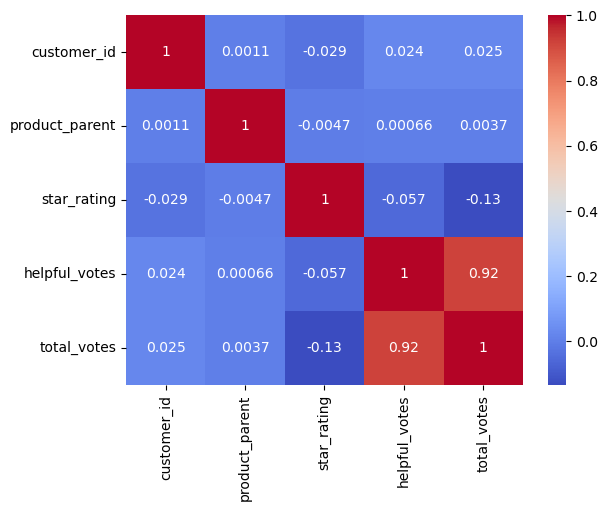

In [25]:
tc = df.corr()
sns.heatmap(tc,annot=True, cmap='coolwarm')
plt.show()

Selecting 4 feature for the recommend system

In [26]:
# Correlation between the reduced dataset
numeric_cols1 = df_reduced.select_dtypes(include=['float64', 'int64'])
correlation_matrix1 = numeric_cols1.corr()
correlation_matrix1

,customer_id,star_rating
customer_id,1.000000,-0.029182
star_rating,-0.029182,1.000000


the correlation matrix shows a weak negative correlation between customer_id and star_rating. This means that there is a slight tendency for the star_rating to decrease slightly as customer_id increases, but the relationship is not strong. it is not important because customer id and star rating do not affect each other

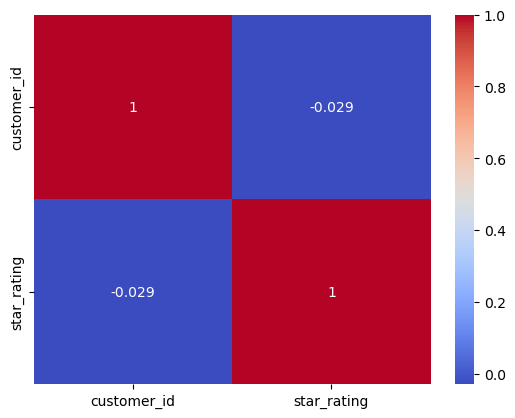

In [27]:
tc = df_reduced.corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')
plt.show()

Popular based recommended system

A popularity-based recommended system is a simple and straightforward approach to recommending items based on their overall popularity or popularity among users. It does not consider any personalized preferences of individual users but instead recommends items that are popular among all users or a large group of users. This type of system is often used in situations where personalized data is limited or not available, making it a good starting point for recommendation systems.

Time taken: 0.02 seconds


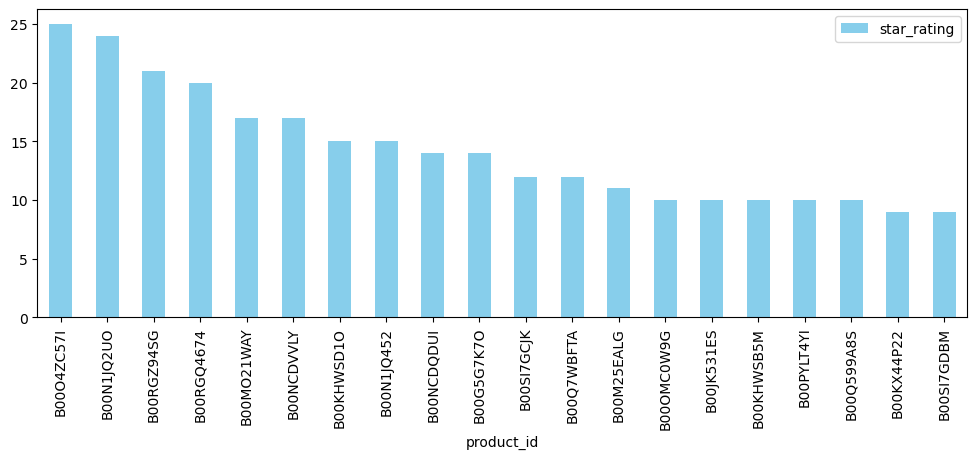

In [61]:
# Most top 20 products
start_time=time.time()
popular_products = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].count())
most_popular = popular_products.sort_values('star_rating', ascending=False)
print(f"Time taken: {time.time() - start_time:.2f} seconds")
most_popular.head(20).plot(kind = "bar",figsize=(12, 4),color='skyblue')
plt.show()

Time taken: 0.02 seconds


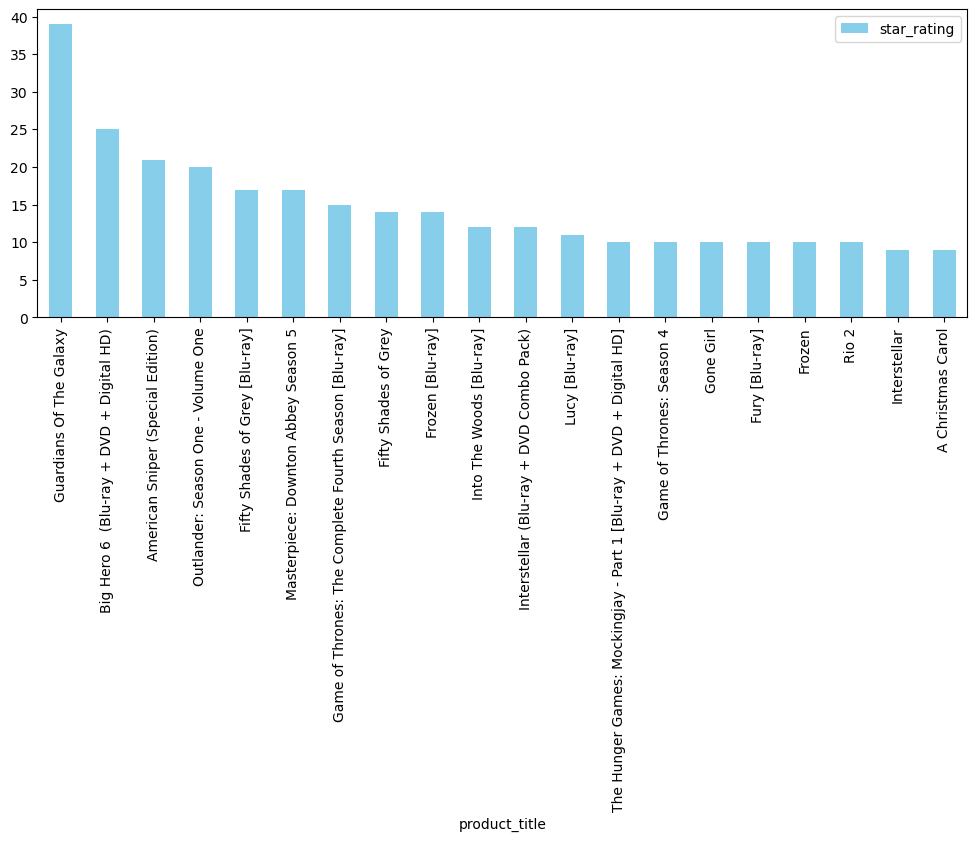

In [60]:
start_time=time.time()
popular_products = pd.DataFrame(df_reduced.groupby('product_title')['star_rating'].count())
most_popular = popular_products.sort_values('star_rating', ascending=False)
print(f"Time taken: {time.time() - start_time:.2f} seconds")
most_popular.head(20).plot(kind = "bar",figsize=(12, 4),color='skyblue')
plt.show()

The weighted rating system

The weighted rating system is a method used to calculate a composite rating by taking into account both the average rating of an item and the number of ratings it has received. It aims to provide a more balanced representation of an item's quality by considering both the rating value and the popularity of the item.


Weighted Rating = ( (v / (v + m)) * R ) + ( (m / (v + m)) * C )

Where:

R is the average rating of the item.
v is the number of ratings the item has received.
m is a parameter that represents the minimum number of ratings required to be considered.
C is the mean rating across all items.

In [30]:
ratings['ratings_average'] = pd.DataFrame(df_reduced.groupby('product_id')['star_rating'].mean())

rate_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count'].astype('int')
rate_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average'].astype('int')
C = rate_averages.mean()
m = rate_counts.quantile(0.95)
ratings.head(10)

,star_rating,ratings_count,ratings_average
product_id,,,
12175412,5.0,1,5.0
12273848,5.0,1,5.0
17702313,5.0,1,5.0
73378208,1.5,2,1.5
98529455,5.0,2,5.0
101529376,1.0,1,1.0
307142094,5.0,1,5.0
307142604,5.0,1,5.0
307514161,5.0,1,5.0


In [31]:
def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)



In [32]:
qualified = ratings[(ratings['ratings_count'] >= m) & (ratings['ratings_count'].notnull()) & (ratings['ratings_average'].notnull())][['ratings_count', 'ratings_average']]
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')


Top movies with weighted rating

In [62]:
start_time=time.time()
qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('wr', ascending=False).head(30)
print(f"Time taken: {time.time() - start_time:.2f} seconds")
pop=qualified.head(20)
pop

Time taken: 0.01 seconds


,ratings_count,ratings_average,wr
product_id,,,
B00O1D3C2K,40,5,4.710771
B00CL1516E,38,5,4.701130
B00005JKZY,38,5,4.701130
B00026L7RM,37,5,4.696064
B00CQ8792G,35,5,4.685400
B00FR23GPW,34,5,4.679782
B00CQ8792Q,34,5,4.679782
B00GTZWXFU,34,5,4.679782
B008JFUP0I,32,5,4.667922


In [34]:
matching_column = 'product_id'
# Merge the two tables based on the matching column
merged_df = df_reduced.merge(pop, on=matching_column, how='inner')
unique_values = merged_df['product_title'].drop_duplicates()

print(unique_values)

0                   The Patriot (Extended Cut) [Blu-ray]
29                                 I Love Lucy: Season 2
59                   Signed, Sealed, Delivered Christmas
99                      Adventures of Superman: Season 1
129                               Wee Sing in Sillyville
166                    Perry Mason: Complete Series Pack
204                       Dragons: Riders of Berk Part 2
239                                    Revenge: Season 3
273    Law & Order: Special Victims Unit - The Fiftee...
307    Batman: The Animated Series, Volume Three (DC ...
335                       Dragons: Riders of Berk Part 1
369                            To Write Love on Her Arms
396    Fast & Furious 6 (Steelbook) (Blu-ray + DVD + ...
428    Band of Brothers / The Pacific (Special Editio...
456        The Lord of the Rings: The Return of the King
494                                I Love Lucy: Season 6
520                           The Golden Girls: Season 6
551    The Land Before Time VI-

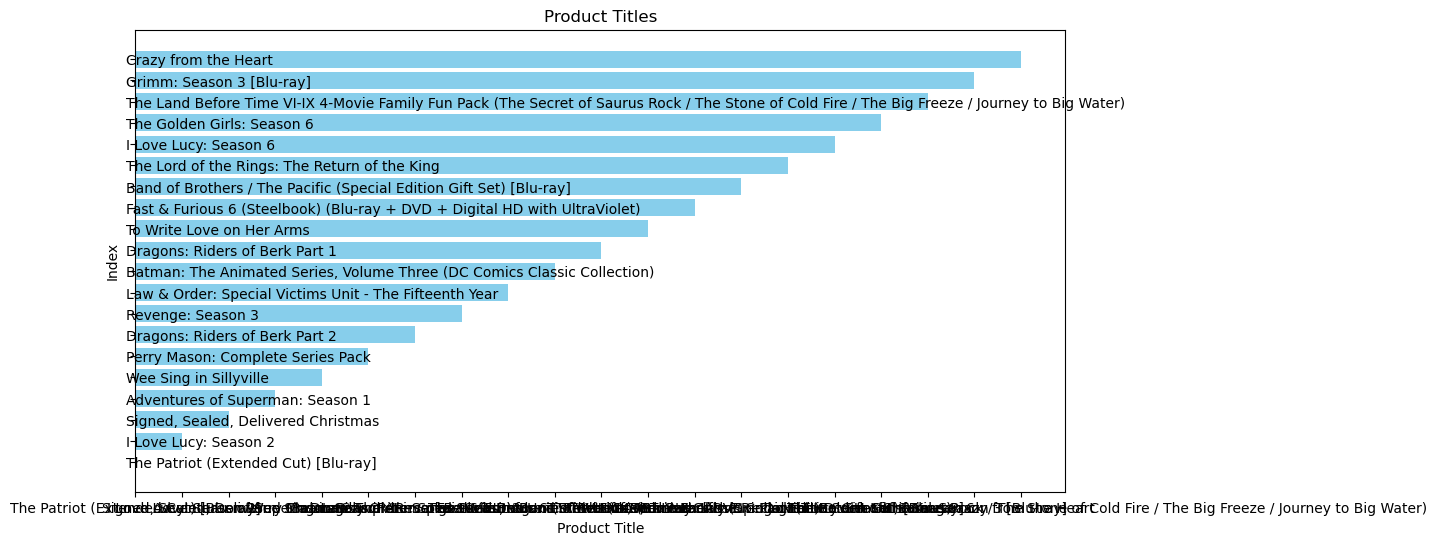

In [35]:
matching_column = 'product_id'
merged_df = df_reduced.merge(pop, on=matching_column, how='inner')
unique_values = merged_df['product_title'].drop_duplicates()
plt.figure(figsize=(12, 6)) 
plt.barh(range(len(unique_values)), unique_values, color='skyblue', align='center')
plt.yticks(range(len(unique_values)), unique_values, ha='left')
plt.xlabel('Product Title')
plt.ylabel('Index')
plt.title('Product Titles')
plt.show()



Cross-validation is a technique used in machine learning to assess the performance of a model on unseen data and evaluate its generalization ability. It involves splitting the available data into multiple subsets or "folds" to simulate the model's performance on different test sets

the result evaluates the performance of the logistic regression model using k-fold cross-validation with different values of k. The model's average accuracy and F1 score are relatively consistent across different k values. the F1 scores are quite low, which could indicate challenges in the model's performance in predicting the star ratings accurately. The results show accuracy and F1 score are not much different between folds. Only the number of folds increased the processing time get longer.

In [36]:
X = df_reduced[['customer_id', 'product_id', 'product_title']]
y = df_reduced['star_rating']
X['customer_id'] = X['customer_id'].astype(str)
X['product_id'] = X['product_id'].astype(str)
X['product_title'] = X['product_title'].astype(str)

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
model = LogisticRegression()

# Perform k-fold cross-validation for k=1 to 5
for k in range(2, 6):
    start_time = time.time()
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_encoded, y, cv=kf)
    f1_scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='f1_macro')
    print(f"Cross-Validation Scores for k={k}:", cv_scores)
    print(f"Average Accuracy for k={k}:", cv_scores.mean())
    print(f"F1 Scores for k={k}:", (f1_scores))
    print(f"Average F1 Score for k={k}:", (f1_scores.mean()))
    print(f"Time taken for k={k}: {time.time() - start_time:.2f} seconds")
    print()


Cross-Validation Scores for k=2: [0.76144773 0.76044973]
Average Accuracy for k=2: 0.760948730416502
F1 Scores for k=2: [0.17291407 0.17278533]
Average F1 Score for k=2: 0.17284970015835593
Time taken for k=2: 12.63 seconds

Cross-Validation Scores for k=3: [0.76172898 0.76044421 0.76067301]
Average Accuracy for k=3: 0.7609487311483537
F1 Scores for k=3: [0.17295032 0.17278462 0.17281415]
Average F1 Score for k=3: 0.17284969556099794
Time taken for k=3: 24.03 seconds

Cross-Validation Scores for k=4: [0.76095272 0.76194275 0.76040573 0.76049373]
Average Accuracy for k=4: 0.760948731142509
F1 Scores for k=4: [0.17285023 0.17297787 0.17277965 0.17279101]
Average F1 Score for k=4: 0.1728496912136238
Time taken for k=4: 38.65 seconds

Cross-Validation Scores for k=5: [0.76163029 0.7615203  0.75987592 0.76132789 0.76038924]
Average Accuracy for k=5: 0.7609487293104746
F1 Scores for k=5: [0.1729376  0.17292342 0.17271125 0.17289862 0.17277753]
Average F1 Score for k=5: 0.17284968310351628
Ti

For KNNwithmeans, the dataset is heavy, so reduced it again to movies with rating more than 22 times

In [37]:
new_df=df_reduced.groupby("product_id").filter(lambda x:x['star_rating'].count() >=22)

In [38]:
new_df.head()

,customer_id,product_id,star_rating,product_title
2,25230040,B004CRR9IS,5,Jillian Michaels Ripped in 30
3,29608241,B00KTFJ6J2,5,NYPD Blue: Season 7
4,17896413,B000Q66J1M,5,2001: A Space Odyssey [Blu-ray]
10,37339300,B0045HCJG2,5,Cobra (1986)
13,3845158,B00NFYCJNY,5,"The Midnight Special with Bonus Disc, 15 addit..."


the results suggest that increasing the number of nearest neighbours (`k`) improves the model's accuracy up to a certain point. In this case, the optimal value of `k` seems to be 5, as it provides the lowest RMSE while maintaining reasonable computation time.

In [39]:
# Function to train and evaluate the model for a given k value
def train_and_evaluate_knn(k_value):
    start_time = time.time()
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(new_df[['customer_id', 'product_id', 'star_rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.3, random_state=10)
    algo = KNNWithMeans(k=k_value, sim_options={'name': 'pearson_baseline', 'user_based': False})
    algo.fit(trainset)
    test_pred = algo.test(testset)
    print(f"Item-based Model : Test Set (k={k_value})")
    accuracy.rmse(test_pred, verbose=True)
    print(f"Time taken for k={k_value}: {time.time() - start_time:.2f} seconds")

# Loop through k values from 1 to 5
for k in range(1, 6):
    train_and_evaluate_knn(k)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-based Model : Test Set (k=1)
RMSE: 0.8879
Time taken for k=1: 3.28 seconds
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-based Model : Test Set (k=2)
RMSE: 0.8857
Time taken for k=2: 2.88 seconds
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-based Model : Test Set (k=3)
RMSE: 0.8853
Time taken for k=3: 3.01 seconds
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-based Model : Test Set (k=4)
RMSE: 0.8852
Time taken for k=4: 2.93 seconds
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-based Model : Test Set (k=5)
RMSE: 0.8851
Time taken for k=5: 2.88 seconds


Collaberative filtering 

The SVD (Singular Value Decomposition) algorithm is a matrix factorization technique used for collaborative filtering. Collaborative filtering aims to make predictions or recommendations based on the past behaviour and preferences of users. The idea is that users who have agreed in the past will agree in the future, and items with similar characteristics will be preferred by similar users.

In [40]:
start_time = time.time()
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reduced[['customer_id', 'product_id', 'star_rating']], reader)
svd = SVD()
results = cross_validate(svd, data, measures=['RMSE', 'MAE', 'MSE', 'fcp'], cv=5, verbose=True)
results_df = pd.DataFrame.from_dict(results)
results_df = results_df.mean()  

trainset = data.build_full_trainset()
svd.fit(trainset)

# Print the cross-validation results
print("\nCross-Validation Results:")
print(results_df)

# Print the model's RMSE on the full training set
print("\nModel Performance on Full Training Set:")
train_preds = svd.test(trainset.build_testset())
train_rmse = accuracy.rmse(train_preds)
print(f"RMSE on Full Training Set: {train_rmse:.4f}")
print(f"Time taken : {time.time() - start_time:.2f} seconds")


Evaluating RMSE, MAE, MSE, FCP of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9226  0.9245  0.9299  0.9205  0.9256  0.9246  0.0032  
MAE (testset)     0.5912  0.5929  0.5956  0.5897  0.5926  0.5924  0.0020  
MSE (testset)     0.8511  0.8547  0.8647  0.8473  0.8568  0.8549  0.0059  
FCP (testset)     0.5043  0.4988  0.4915  0.5059  0.4972  0.4995  0.0052  
Fit time          6.83    7.31    6.98    7.05    7.39    7.11    0.21    
Test time         0.93    0.96    0.66    0.91    1.02    0.90    0.12    

Cross-Validation Results:
test_rmse    0.924619
test_mae     0.592401
test_mse     0.854931
test_fcp     0.499530
fit_time     7.112914
test_time    0.895024
dtype: float64

Model Performance on Full Training Set:
RMSE: 0.6331
RMSE on Full Training Set: 0.6331
Time taken : 64.61 seconds


The output you provided shows the evaluation results of the SVD algorithm on 5 splits (folds) of the dataset using cross-validation. It also shows the performance of the model on the full training set
the evaluation results show that the SVD collaborative filtering algorithm performs reasonably well in terms of RMSE, MAE, and FCP. The model seems to generalize well, as the evaluation metrics on the cross-validated folds are close to the performance on the full training set.


In [41]:

def recommend_movies_for_user(customer_id, svd_model, df_reduced):
    start_time=time.time()
    product_id_list = df_reduced['product_id'].unique()
    product_id_to_surprise_id = {}
    surprise_id_to_product_id = {}

    for i, product_id in enumerate(product_id_list):
        product_id_to_surprise_id[product_id] = i
        surprise_id_to_product_id[i] = product_id

    user_product_ratings = []
    user_ratings = df_reduced[df_reduced['customer_id'] == customer_id]
    for _, row in user_ratings.iterrows():
        product_id = row['product_id']
        rating = row['star_rating']
        surprise_id = product_id_to_surprise_id[product_id]
        user_product_ratings.append((surprise_id, rating))

    user_predictions = []
    for surprise_id, rating in user_product_ratings:
        prediction = svd_model.predict(customer_id, surprise_id, r_ui=rating)
        user_predictions.append((prediction.iid, prediction.est))

    user_predictions = [(surprise_id_to_product_id[surprise_id], est) for surprise_id, est in user_predictions]
    user_predictions.sort(key=lambda x: x[1], reverse=True)
    
    print(f"Time taken : {time.time() - start_time:.2f} seconds")
    return user_predictions[:5]  




The function aims to recommend movies to a user based on their past ratings. It uses correlation-based collaborative filtering to find movies that have a high correlation with the user's previous ratings and filters the recommendations based on a minimum rating count

In [42]:
customer_id = 25230040  # Define the customer ID here
recommended_movies = recommend_movies_for_user(customer_id=customer_id, svd_model=svd, df_reduced=df_reduced)

print(f"\nTop 5 Recommended Movies for customer_id = {customer_id}:")
for product_id, estimated_rating in recommended_movies:
    print(f"Movie ID: {product_id}, Estimated Rating: {estimated_rating:.2f}")


Time taken : 0.09 seconds

Top 5 Recommended Movies for customer_id = 25230040:
Movie ID: B004CRR9IS, Estimated Rating: 4.60


In [43]:
customer_id = 52751110  # Define the customer ID here
recommended_movies = recommend_movies_for_user(customer_id=customer_id, svd_model=svd, df_reduced=df_reduced)

print(f"\nTop 5 Recommended Movies for customer_id = {customer_id}:")
for product_id, estimated_rating in recommended_movies:
    print(f"Movie ID: {product_id}, Estimated Rating: {estimated_rating:.2f}")

Time taken : 0.08 seconds

Top 5 Recommended Movies for customer_id = 52751110:
Movie ID: B0073O0AME, Estimated Rating: 4.61
Movie ID: B001UW58YK, Estimated Rating: 4.61
Movie ID: B009KKLQKO, Estimated Rating: 4.61
Movie ID: B002H3T3TM, Estimated Rating: 4.61


In [44]:
recommended_movies = recommend_movies_for_user(customer_id=29608241, svd_model=svd, df_reduced=df_reduced)
print(f"\nTop 5 Recommended Movies for customer_id = {customer_id}:")
for product_id, estimated_rating in recommended_movies:
    print(f"Movie ID: {product_id}, Estimated Rating: {estimated_rating:.2f}")

Time taken : 0.07 seconds

Top 5 Recommended Movies for customer_id = 52751110:
Movie ID: B00KTFJ6J2, Estimated Rating: 4.79
Movie ID: B00BNAE6M4, Estimated Rating: 4.79
Movie ID: B00I458456, Estimated Rating: 4.79
Movie ID: B00AEFXWXI, Estimated Rating: 4.79
Movie ID: B000UX6TPM, Estimated Rating: 4.79


Because the size of the data was big and my computer is not able to process data. I got random sample from dataset

In [45]:
df_reduced=df_reduced.sample(n=10000,replace=False)
df_reduced.shape

(10000, 4)

In [46]:
df_reduced.head()

,customer_id,product_id,star_rating,product_title
485455,31160781,B00KJO2USM,5,Wipers Times
20438,51563707,B00005JLIU,5,Thoroughly Modern Millie
505143,10083101,B001MT7ZLA,5,Repo The Genetic Opera [Blu-ray]
487550,11458715,B00121QGUO,5,Hidalgo [Blu-ray]
488187,22008677,B00GEGQEVS,5,The Sound of Music LIMITED EDITION Blu-ray / D...


In [47]:
movie_rate = df_reduced.pivot_table(index='customer_id', columns='product_title', values='star_rating')
movie_rate.fillna(0, inplace=True)

In [48]:
movie_rate.shape

(9389, 7812)

In [49]:
movie_rate.head()

product_title,10.5,2012,#SorryNotSorry with Jenna Kim Jones,$5 a Day,(500) Days of Summer,(Double Feature) Semi-Tough / Gator,*Batteries Not Included,1 The Movie (Formula One) [Blu-ray],1-2-3 Magic: Managing Difficult Behavior in Children 2-12,1-Mile Jog: Walk at Home with Leslie Sansone - Advanced,...,Zookeeper (Two-Disc Blu-ray/DVD Combo),Zotz!,iWorship @ Home Volume 3,l'alcova dvd Italian Import,passing of the 3rd floor back,r100 [Blu-ray],sharks 3-D Dolphins and whales 3-D Ocean Wonderland 3-D,thirtysomething: Season 2,wall e,"¿Que Pasa, USA? La Completa Collection"
customer_id,,,,,,,,,,,,,,,,,,,,,
14962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
movie_rate.describe()

product_title,10.5,2012,#SorryNotSorry with Jenna Kim Jones,$5 a Day,(500) Days of Summer,(Double Feature) Semi-Tough / Gator,*Batteries Not Included,1 The Movie (Formula One) [Blu-ray],1-2-3 Magic: Managing Difficult Behavior in Children 2-12,1-Mile Jog: Walk at Home with Leslie Sansone - Advanced,...,Zookeeper (Two-Disc Blu-ray/DVD Combo),Zotz!,iWorship @ Home Volume 3,l'alcova dvd Italian Import,passing of the 3rd floor back,r100 [Blu-ray],sharks 3-D Dolphins and whales 3-D Ocean Wonderland 3-D,thirtysomething: Season 2,wall e,"¿Que Pasa, USA? La Completa Collection"
count,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,...,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000
mean,0.000533,0.000533,0.000533,0.000426,0.001065,0.000320,0.001065,0.000107,0.000533,0.000107,...,0.000426,0.000533,0.000533,0.000533,0.000533,0.000107,0.000533,0.000533,0.000533,0.000533
std,0.051601,0.051601,0.051601,0.041281,0.072971,0.030961,0.072971,0.010320,0.051601,0.010320,...,0.041281,0.051601,0.051601,0.051601,0.051601,0.010320,0.051601,0.051601,0.051601,0.051601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,5.000000,1.000000,5.000000,1.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [51]:
ratings =pd.DataFrame(df_reduced.groupby('product_title')['star_rating'].mean())
ratings['rating_numbers'] = pd.DataFrame(df.groupby('product_title')['star_rating'].count())


Content base recommendation

the recommendation system uses correlation-based collaborative filtering to identify movies that are highly correlated with the user's interest in a specific movie. It then recommends these correlated movies to the user, considering a minimum rating count to ensure the recommendations are based on sufficient data. This system is a basic form of collaborative filtering, which relies on user-item interactions to make recommendations.

In [52]:
def recommend_movies(name , min_rate_no = 10):
    start_time=time.time()
    user_rating = movie_rate[name]
    similar_movies = movie_rate.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
    corr_movies.dropna(inplace=True)
    corr_movies = corr_movies.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')
    
    final = corr_movies[corr_movies['rating_numbers']>min_rate_no].sort_values('Correlation', ascending=False)
    print(f"Time taken : {time.time() - start_time:.2f} seconds")
    return final




In [53]:
recommendations = recommend_movies('The Bridges of Madison County')
recommendations.head(n=10)

Time taken : 1.09 seconds


,Correlation,rating_numbers
product_title,,
The Bridges of Madison County,1.000000,53
Finding Nemo (Five-Disc Ultimate Collector's Edition: Blu-ray 3D/Blu-ray/DVD + Digital Copy),-0.000107,24
Guess Who's Coming to Dinner (40th Anniversary Edition),-0.000107,37
Sex and the City and Sex and the City 2 (BD) (DBFE) [Blu-ray],-0.000107,15
Super Simple Songs - Video Collection - Vol. 1,-0.000107,27
Psycho,-0.000107,60
Stargate Atlantis: The Complete Series Collection,-0.000107,72
2001: A Space Odyssey [Blu-ray],-0.000107,38
Lake Placid,-0.000107,15


In [55]:
recommendations = recommend_movies('Lake Placid')
recommendations.head(n=10)

Time taken : 1.06 seconds


,Correlation,rating_numbers
product_title,,
Lake Placid,1.000000,15
Super Simple Songs - Video Collection - Vol. 1,-0.000107,27
Lavell Crawford: Can a Brother Get Some Love?,-0.000107,12
The Notebook (2004),-0.000107,132
A Certain Magical Index II: Season 2 - Part 2 [Blu-ray],-0.000107,12
Gilmore Girls: The Complete Series Collection,-0.000107,90
WINGS - The Complete Series,-0.000107,77
Beautiful Creatures (DVD),-0.000107,35
The Monster That Challenged the World / It! The Terror from Beyond Space (Midnite Movies Double Feature),-0.000107,28


In [57]:
# Get recommendation for special movie
recommendations = recommend_movies('The Notebook (2004)')
recommendations.head(n=10)

Time taken : 1.04 seconds


,Correlation,rating_numbers
product_title,,
The Notebook (2004),1.000000,132
Lavell Crawford: Can a Brother Get Some Love?,-0.000107,12
A Certain Magical Index II: Season 2 - Part 2 [Blu-ray],-0.000107,12
Kindergarten Cop,-0.000107,33
Super Simple Songs - Video Collection - Vol. 1,-0.000107,27
Pumpkinhead: Ashes to Ashes / Pumpkinhead 4: Blood Feud (Double Feature),-0.000107,12
WINGS - The Complete Series,-0.000107,77
Beautiful Creatures (DVD),-0.000107,35
Movies 4 You - Sci Fi Classics (The Man from Planet X / Beyond the Time Barrier / The Time Travelers / The Angry Red Planet),-0.000107,40
